# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# TD2 - Régression linéaire

Ce TD concerne la régression linéaire (Chapitre 2 du cours). À la fin de ce TD, vous devriez être avoir été en mesure de :
- Estimer les coefficients des paramètres de la régression linéaire simple avec la méthode des moindres carrés.
- Estimer les coefficients des paramètres de la régression linéaire multiple avec la méthode des moindres carrés.
- Calculer le coefficient de détermination.
- Sélectionner le meilleur modèle unidimensionnel.
- Calculer avec des méthodes numériquement stables les coefficients de régression.

# Contexte : Pourcentage de matière grasse

Le pourcentage de matière grasse d'un patient est une mesure largement utilisée en médecine pour estimer les facteurs de risque de plusieurs maladies. Cette quantité est cependant très difficile à mesurer. La mesure implique en effet d’immerger le patient dans un cylindre gradué rempli d’eau afin de calculer sa masse volumique. Cette procédure est non seulement inconfortable pour le patient mais pratiquement impossible à effectuer dans le bureau du médecin.

Par conséquent, on souhaite savoir si on peut prédire le pourcentage de gras Y avec trois mesures beaucoup plus simples à obtenir :

- $x_1$ : l'épaisseur des plis de la peau des triceps (en mm) ;<br/>
- $x_2$ : le tour de cuisse (en mm) ;<br/>
- $x_3$ : la circonférence du bras en (mm).<br/>

Les mesures du fichier *bodyfat.csv* proviennent de 20 femmes en bonne santé, âgées entre 20 et 34 ans. Ceci est un jeu de données réel.


In [8]:
# Chargement des librairies
using CSV, DataFrames, Distributions, Gadfly, Statistics, LinearAlgebra

# Exercice 1 - Régression linéaire simple

Nous étudierons dans cet exercice la meilleure variable explicative pour le pourcentage de matière grasse.

In [2]:
# Chargement des données
data = CSV.read("bodyfat.csv", DataFrame)
first(data,5)

Row,Triceps,Thigh,Midarm,Bodyfat
,Float64,Float64,Float64,Float64
1,19.5,43.1,29.1,11.9
2,24.7,49.8,28.2,22.8
3,30.7,51.9,37.0,18.7
4,29.8,54.3,31.1,20.1
5,19.1,42.2,30.9,12.9


## a) Affichage du pourcentage de graisse en fonction des variables explicatives

Tracer les nuages de points du pourcentage de graisse en fonction des variables explicatives. 

- Est-ce qu'une relation linéaire semble appropriée pour chacune de ces trois variables ? 
- Quelle variable vous semble la meilleure et pour quelle raison ?

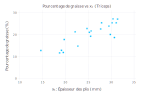

In [7]:
# Nuage de points : Bodyfat en fonction de Triceps (x₁)
plot(data, x=:Triceps, y=:Bodyfat, Geom.point,
    Guide.xlabel("x₁: Épaisseur des plis (mm)"), 
    Guide.ylabel("Pourcentage de graisse (%)"),
    Guide.title("Pourcentage de graisse vs x₁ (Triceps)"))

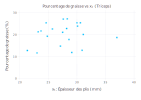

In [53]:
# Nuage de points : Bodyfat en fonction de Triceps (x₁)
plot(data, x=:Midarm, y=:Bodyfat, Geom.point,
    Guide.xlabel("x₁: Épaisseur des plis (mm)"), 
    Guide.ylabel("Pourcentage de graisse (%)"),
    Guide.title("Pourcentage de graisse vs x₁ (Triceps)"))

## b) Estimation des paramètres de la régression linéaire simple avec $x₁$


In [52]:

x₁ = data.Triceps
y = data.Bodyfat
n = length(y)

x̄₁ = mean(x₁)
ȳ = mean(y)

β̂₁ = sum((x₁ .- x̄₁) .* (y .- ȳ)) / sum((x₁ .- x̄₁).^2)

β̂₀ = ȳ - β̂₁ * x̄₁

println("β̂₀ = ", round(β̂₀, digits=2))
println("β̂₁ = ", round(β̂₁, digits=3))

β̂₀ = -1.5
β̂₁ = 0.857


In [ ]:
# Vous devriez obtenir β̂₀ = -1.50 et β̂₁ = 0.857.

## c) Affichage de la droite de régression obtenue

Superposez au nuage de points précédent la droite de régression estimée. Vous pouvez utiliser la géométrie `Geom.abline()` de *Gadfly*. 

┌ Warning: intersect is not a recognized aesthetic. Ignoring.
└ @ Gadfly C:\Users\lucas\.julia\packages\Gadfly\euqnP\src\mapping.jl:63


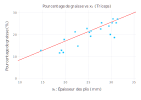

In [46]:
plot(data, x=:Triceps, y=:Bodyfat, Geom.point, intersect=[β̂₀],Geom.abline(color="red"), slope=[β̂₁],
    Guide.xlabel("x₁: Épaisseur des plis (mm)"), 
    Guide.ylabel("Pourcentage de graisse (%)"),
    Guide.title("Pourcentage de graisse vs x₁ (Triceps)"))






## d) Calcul du coefficient de détermination

Calculez le coefficient de détermination de la régression.

In [ ]:
x2 = data.Triceps
y = data.Bodyfat

# Calcul des moyennes
ŷ = β̂₀ .+ β̂₁ .* x₁

SST = sum((y .- mean(y)).^2) 
SSR = sum((ŷ .- mean(y)).^2) 

R2x2 = SSR / SST

println(R2x2)

0.711096615555969


In [ ]:
# Vous devriez obtenir R² = 0.7110966155559691

## e) Interprétation du modèle de régression

Donnez une interprétation de 
- de l'estimation de l'ordonnée à l'origine $β̂₀$ ;
- de l'estimation de la pente $β̂₁$ ;
- du coefficient de détermination $R²$ .

In [ ]:
- Interception (β̂₀) : valeur attendue du pourcentage de graisse lorsque x₁ = 0 mm. Numériquement, β̂₀ ≈ -1.50 %. Cette valeur n’a pas d’interprétation physique directe (0 mm de plis est hors domaine), mais elle positionne la droite de régression.
- Pente (β̂₁) : variation moyenne du pourcentage de graisse pour une augmentation de 1 mm du pli tricipital. Ici, β̂₁ ≈ 0.857, donc +1 mm en x₁ est associé à ≈ +0.857 point de % de graisse, en moyenne (relation linéaire croissante).
- Coefficient de détermination (R²) : part de la variabilité de Y expliquée par le modèle linéaire avec x₁. Ici, R² ≈ 0.711, soit ~71.1 % de la variance expliquée; ~28.9 % reste non expliqué (autres facteurs, variabilité intrinsèque, non‑linéarités).

0.711096615555969


## f)  Identification du meilleur modèle unidimensionnel

Identifiez lequel parmi les trois modèles de régression linéaire simple est le meilleur pour prédire le pourcentage de matière grasse d'un patient ? Justifier quantitativement votre réponse. 

Indice : calculez le coefficient de détermination de chacun des modèles et sélectionnez celui ayant le plus grand.

In [ ]:
R2x1 = 0.711096615555969


In [38]:
x2 = data.Thigh
y = data.Bodyfat
n = length(y)

# Calcul des moyennes
x̄2 = mean(x2)
ȳ = mean(y)

β̂₁ = sum((x2 .- x̄2) .* (y .- ȳ)) / sum((x2 .- x̄2).^2)

β̂₀ = ȳ - β̂₁ * x̄₁

ŷ = β̂₀ .+ β̂₁ .* x₁

SST = sum((y .- mean(y)).^2) 
SSR = SSR = sum((ŷ .- mean(y)).^2) 

R2x2 = SSR / SST

println(R2x2)


0.7100352979201467


In [55]:


β̂₁ = cov(data.Midarm, data.Bodyfat)/var(data.Midarm)

β̂₀ = ȳ - β̂₁ * mean(data.Midarm)

ŷ = β̂₀ .+ β̂₁ .* data.Midarm

SST = sum((y .- mean(y)).^2) 
SSR = SSR = sum((ŷ .- mean(y)).^2) 

R2x3 = SSR / SST

println(R2x3)


0.020290301881323806


# Exercice 2 - Régression linéaire multiple

Dans cet exercice, les trois variables explicatives seront utilisées pour prédire le pourcentage de matière grasse d'un patient.

## a) Estimation des paramètres de la régression linéaire multiple

En utilisant les trois variables explicatives, estimez les paramètres de la régression linéaire multiple avec la méthode des moindres carrés.

In [ ]:

X = [ones(size(data,1)) data.Triceps data.Thigh data.Midarm]
y = data.Bodyfat

β̂  = inv(X' * X) * X' * y
println(β̂ )

[117.08469478023471, 4.334092008380139, -2.8568479362993457, -2.1860602516953804]


In [ ]:
# Vous devriez obtenir β̂ = [117.0846947802495, 4.334092008375274, -2.856847936298782, -2.186060251693594]

## b) Calcul du coefficient de détermination 


Calculez le coefficient de détermination et comparez-le à ceux de la question 1 (f). Pouvez-vous conclure que ce modèle est meilleur ?

In [ ]:

y = data.Bodyfat

ŷ = X * β̂

SST = sum((y .- mean(y)).^2)        
SSR = sum((ŷ .- mean(y)).^2)        

R2 = SSR / SST

println("R² (modèle multiple) = ", R2)

R² (modèle multiple) = 0.8013585508704457


In [ ]:
# Vous devriez obtenir R² = 0.8013585508623703

## c) Calcul d'une prédiction

Si une patiente possède les caractérisques suivantes :

 - $x_1$ = 25.0
 - $x_2$ = 51.0
 - $x_3$ = 27.5
 
 Quelle est la meilleure prédiction pour son pourcentage de pourcentage de graisse ?

In [59]:
y = [1 25 51 27.5] * β̂

1-element Vector{Float64}:
 19.6210933168486

In [ ]:
# Vous devriez obtenir 19.6

## d) Calcul des coefficients de régression à l'aide de la décomposition QR

Pour rendre les calculs numériques stables et efficaces, les coefficients de régressions sont généralement calculés à l'aide de la décomposition QR de la matrice de structure X, *i.e.*
$$ X = QR.$$

On peut montrer (Exercice 1 de la fin du chapitre 2 des notes de cours) que 

$$ β̂ = R^{-1} Q^\top y.$$

L'opération de la décomposition QR et de la résolution du système linéaire s'effectue en une commande à l'aide de l'opérateur `\`.

Estimez les coefficients de régression avec la commande `β̂ = X \ y`. Obtenez-vous les mêmes résultats ?


Pour de grands jeux de données, cette solution est beaucoup plus performante et précise. Pour de petits jeux de données tel que celui-ci, ce n'est pas plus rapide de passer par la décomposition QR mais ça demeure plus précis numériquement.